In [2]:
! pip install psycopg2

In [3]:
import psycopg2

In [6]:
conn = psycopg2.connect(
    database = "Sql_Challenge",
    user="postgres",
    password="Regus8901",
    host="localhost",
    port="5432"
)

print("Connect")

Connect


In [8]:
import pandas as pd

In [38]:
import numpy as np

In [11]:
salary_data = pd.read_sql('SELECT * FROM "Employee_Salaries"', conn)

In [13]:
salary_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [15]:
salary_data.count()

emp_no       300024
salary       300024
from_date    300024
to_date      300024
dtype: int64

In [18]:
min(salary_data["salary"])

40000

In [17]:
max(salary_data["salary"])

129492

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Employee Salary Ranges')

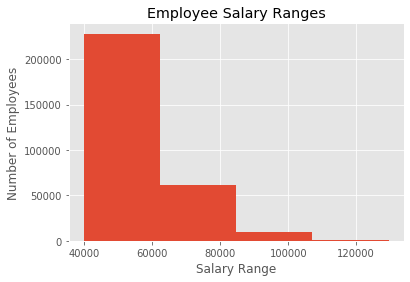

In [23]:
x = salary_data["salary"]
plt.style.use('ggplot')
plt.hist(x,bins=4)
plt.xlabel("Salary Range")
plt.ylabel("Number of Employees")
plt.title("Employee Salary Ranges")

In [24]:
title_data = pd.read_sql('SELECT * FROM "Employee_Title"', conn)

In [25]:
title_data.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [28]:
merged_employee_data = pd.merge(salary_data,title_data,on="emp_no",how='left')
merged_employee_data.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [56]:
groupedmerge = merged_employee_data.groupby(["title"])
means = groupedmerge.mean()
means

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


In [57]:
titles = ["Assistant Engineer","Engineer","Manager","Senior Engineer","Senior Staff","Staff","Technique Leader",]

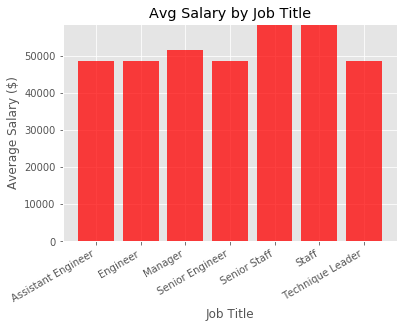

In [63]:
x_axis = np.arange(0, len(titles))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Avg Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary ($)")

plt.xlim(-0.75, len(titles)-.25)
plt.ylim(0, max(means["salary"]) + 5)

plt.bar(x_axis, means["salary"], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, titles,rotation=30, ha='right')
plt.show()